# Image Compression

A grayscale image is just a matrix where the numbers represent the intensity of a given pixel, such a matrix can be decomposed just like any other matrix using Singular Value Decomposition (SVD).

SVD is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler.

For the case of simplicity we will focus on the SVD for real-valued matrices and ignore the case for complex numbers.
$A = U . \Sigma . V^T$

Where A is the real m x n matrix that we wish to decompose, U is an m x m matrix, Sigma ($\Sigma$) is an m x n diagonal matrix, and $V^T$ is the  transpose of an n x n matrix where T is a superscript.

The SVD can be calculated by calling python svd() function.

The function takes a matrix and returns the U, $\Sigma$ and $V^T$ elements. The Sigma diagonal matrix is returned as a vector of singular values. The V matrix is returned in a transposed form.

The original matrix can be reconstructed from the U, Sigma, and V^T elements. And if you took $r$ columns from U to make $\hat{U}$, and $r$ elements from Sigma to make $\hat{\Sigma}$ and $r$ rows from V^T to make $\hat{V}^T$, you can approximate the original matrix using $\hat{U} . \hat{\Sigma} . \hat{V}^T$

In this notebook, you will approximate a grayscale image using $r$ singular values and singular vectors from the U, Sigma and V^T matrices; hence, you compress the image into $2r$ rows and $r$ scalars only.

## Load the image

In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


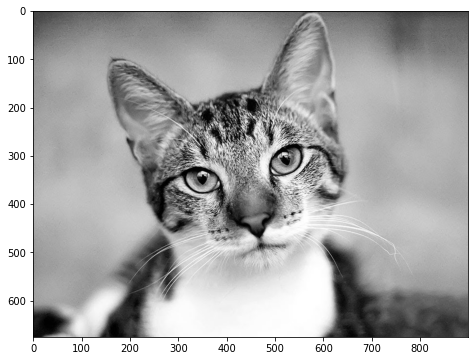

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from PIL import Image

#load an image and convert it to black and white.
img = Image.open('Domestic-feline-tabby-cat.jpg')
imggray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imggray);

## Convert the image to numpy array

(675, 900)
[[68 71 65 ... 71 71 73]
 [64 67 64 ... 67 69 71]
 [63 66 65 ... 72 75 78]
 ...
 [14 12 12 ... 69 67 65]
 [14 12 12 ... 67 65 64]
 [14 12 12 ... 66 64 62]]


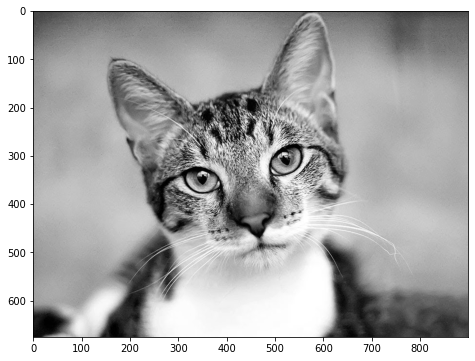

In [4]:
#convert the image data into a numpy matrix, plotting the result to show the data is unchanged.
img = np.asarray(imggray)[:,:,0]
plt.figure(figsize=(9,6))
plt.imshow(img, cmap='gray');
print(img.shape)
print(img)

## Compute SVD of the image

In [7]:
u, sigma, v_transpose = np.linalg.svd(img)

In [11]:
print(u.shape)
print(sigma.shape)
print(v_transpose.shape)

(675, 675)
(675,)
(900, 900)


In [32]:
np.diag(sigma).shape

(675, 675)

## Check if you can reconstruct the image again

Plot the image

In [38]:
#u @ np.diag(sigma) @ v_transpose
m, n = img.shape
img_reconstructed = u[:,:n] @ np.diag(sigma) @ v_transpose[:m,:]
img_reconstructed.shape

(675, 900)

[[68. 71. 65. ... 71. 71. 73.]
 [64. 67. 64. ... 67. 69. 71.]
 [63. 66. 65. ... 72. 75. 78.]
 ...
 [14. 12. 12. ... 69. 67. 65.]
 [14. 12. 12. ... 67. 65. 64.]
 [14. 12. 12. ... 66. 64. 62.]]


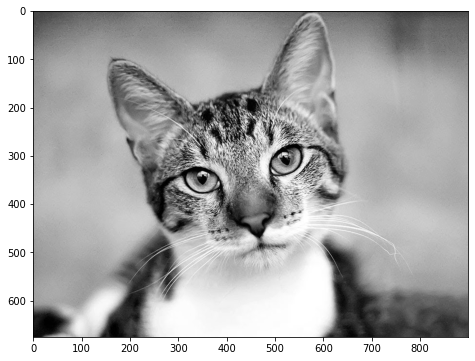

In [57]:
plt.figure(figsize=(9,6))
plt.imshow(img_reconstructed, cmap='gray');
print(img_reconstructed)

## Reconstruct the image using $r = 1$

Plot the reconstructed image

In [46]:
u[:,0:1].shape

(675, 1)

In [47]:
v_transpose[0:1:,:].shape

(1, 900)

In [62]:
sigma[0:1]

array([124219.93294143])

In [78]:
r1 = sigma[0:1] * u[:,0:1] @ v_transpose[0:1:,:]
r1.shape

(675, 900)

[[ 83.09536354  83.35712974  83.680814   ...  87.84574243  87.82199772
   87.83440635]
 [ 84.24522813  84.51061662  84.83877999 ...  89.06134224  89.03726896
   89.0498493 ]
 [ 85.69586676  85.96582503  86.29963913 ...  90.59491069  90.57042288
   90.58321984]
 ...
 [131.2328159  131.64622422 132.15741999 ... 138.7351069  138.69760679
  138.71720379]
 [131.50889578 131.92317381 132.43544499 ... 139.02696966 138.98939066
  139.00902889]
 [131.61365492 132.02826296 132.54094222 ... 139.13771765 139.10010871
  139.11976258]]


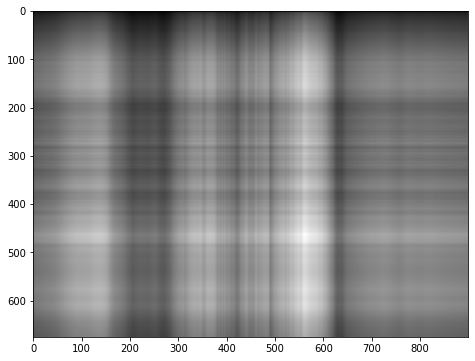

In [76]:
plt.figure(figsize=(9,6))
plt.imshow(r1, cmap='gray');
print(r1)

## Reconstruct the image using $r = 2 \rightarrow 50$

Plot the reconstructed images

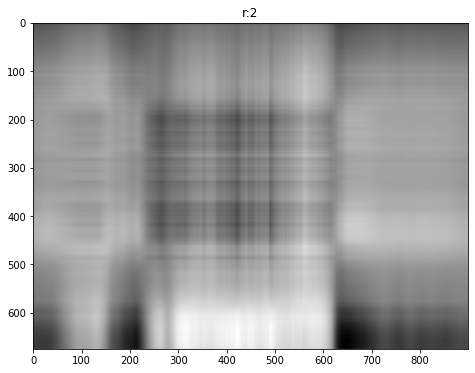

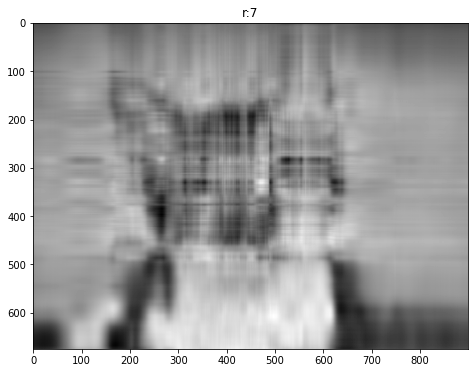

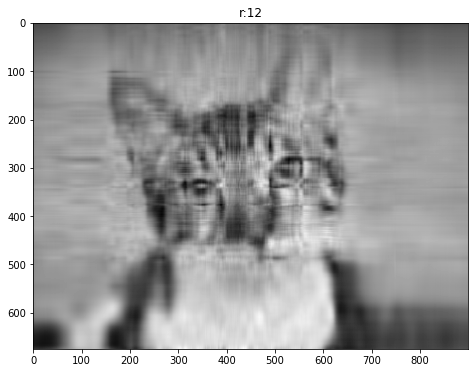

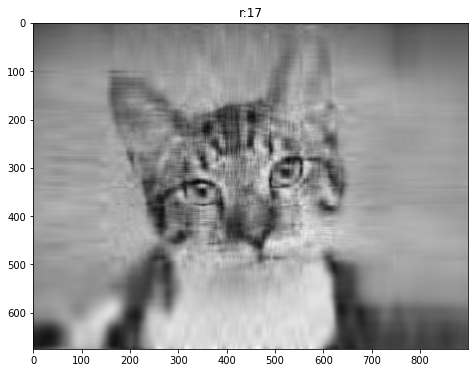

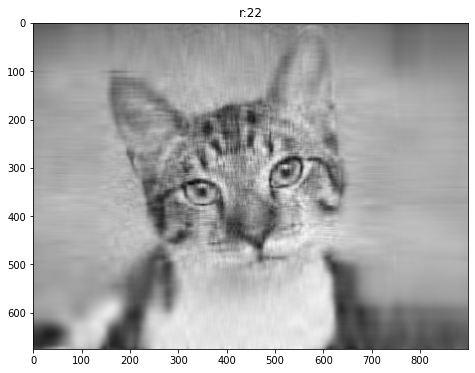

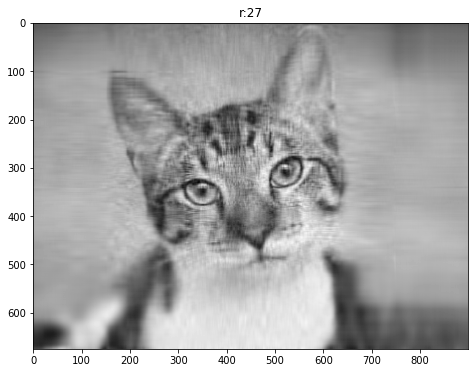

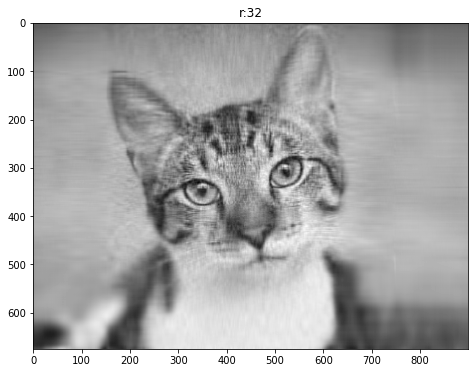

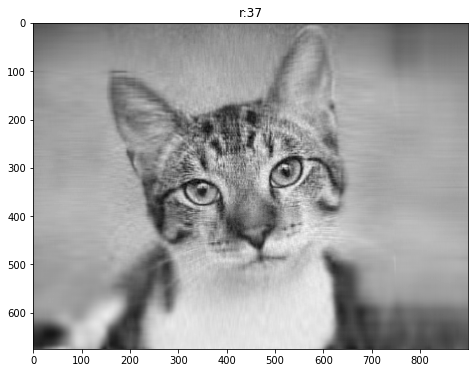

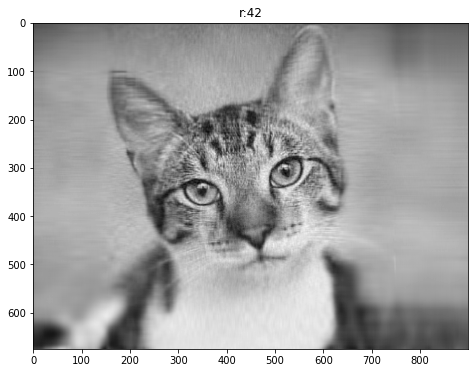

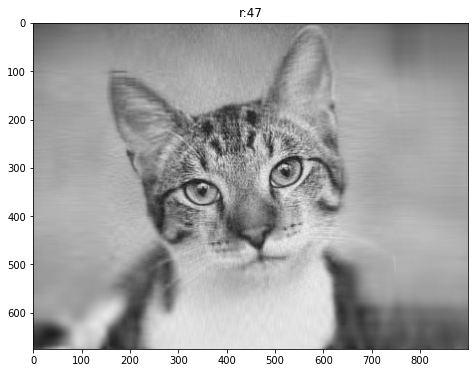

In [70]:
for i in range(2,50,5):
    r = sigma[0:i] * u[:,0:i] @ v_transpose[0:i:,:]
    plt.figure(figsize=(9,6))
    plt.imshow(r, cmap='gray');
    plt.title('r:'+str(i))